In [67]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [74]:
import pandas as pd

# Load datasets
customers = pd.read_csv('/content/drive/MyDrive/Deepu_K_uvce/Customers.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Deepu_K_uvce/Transactions.csv')

# Display the first few rows of each dataset
print(customers.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [75]:
# Merge datasets
merged = transactions.merge(customers, on="CustomerID", how="left")

In [76]:
features = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum',    # Total quantity purchased
    'TransactionDate': 'count'  # Frequency of transactions
}).rename(columns={'TransactionDate': 'TransactionCount'})

In [77]:
# Merge
features = features.merge(customers.set_index('CustomerID'), on='CustomerID')
features = pd.get_dummies(features, columns=['Region'], drop_first=True)


In [78]:
# Drop non-numerical data and scale features
X = features.drop(['CustomerName', 'SignupDate'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
kmeans = KMeans(n_clusters=4, random_state=42)
features['Cluster'] = kmeans.fit_predict(X_scaled)

In [81]:
# Calculate Davies-Bouldin Index to evaluate clustering
db_index = davies_bouldin_score(X_scaled, features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 0.9880667545355788


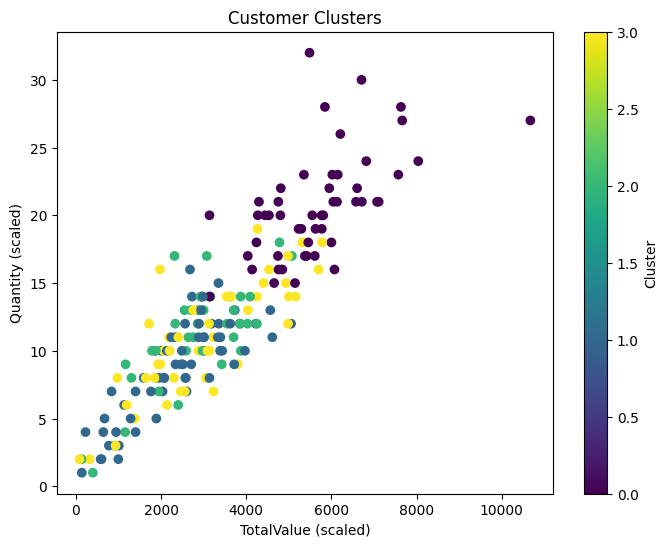

In [82]:
# Visualize clusters using a scatter plot of TotalValue vs. Quantity
plt.figure(figsize=(8, 6))
plt.scatter(features['TotalValue'], features['Quantity'], c=features['Cluster'], cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('TotalValue (scaled)')
plt.ylabel('Quantity (scaled)')
plt.colorbar(label='Cluster')
plt.show()